# Stationarity of a Time Series

### Notebook Content

### Stationarity of a Time Series

1. Test-for-Stationary
2. Differencing
3. Decomposing

# Stationarity of a Time Series
A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time.
**We can say that if a TS has a particular behaviour over time**, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

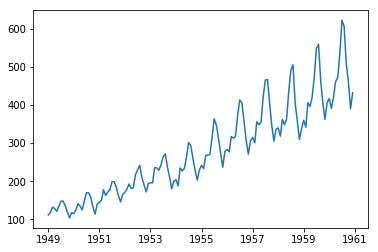

In [23]:
plt.plot(data)

### Test for Stationary

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences (we’ll see such cases later). So, more formally, we can check stationarity using the following:
1. **Plotting Rolling Statistics:** We can plot the moving average or moving variance and see if it varies with time.
2. **Dickey-Fuller Test:** This is one of the statistical tests for checking stationarity.
<br>**Note:** for further study click on link https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/ 

Back to checking stationarity, we’ll be using the rolling statistics plots along with Dickey-Fuller test results a lot so I have defined a function which takes a TS as input and generated them for us. Please note that I’ve plotted standard deviation instead of variance to keep the unit similar to mean.

In [24]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(window=24).std()
#     rolstd = timeseries.rolling(12).mean()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='gold', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

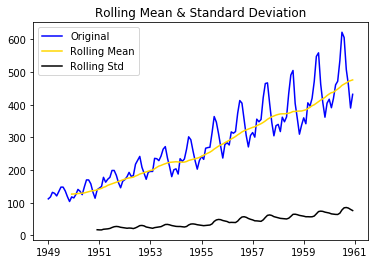

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [25]:
# test for stationarity 
test_stationarity(data.Passengers)

Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values. Note that the signed values should be compared and not the absolute values.

### How to make a Time Series Stationary?
A time series can be broken down into 3 components.<br>
**Trend:** Upward & downward movement of the data with time over a large period of time (i.e. house appreciation)<br>
**Seasonality:** Seasonal variance (i.e. an increase in demand for ice cream during summer)<br>
**Noise:** Spikes & troughs at random intervals

<br>**Eliminating Trend and Seasonality**
The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

1. Differencing – taking the differece with a particular time lag
2. Decomposition – modeling both trend and seasonality and removing them from the model.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


### Differencing
One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:

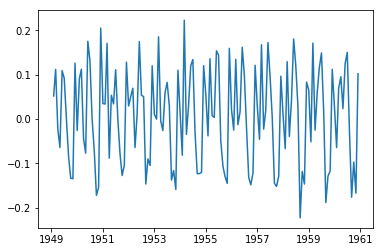

In [26]:
# By taking log 
data_log = np.log(data)
data_diff = data_log - data_log.shift()
plt.plot(data_diff)

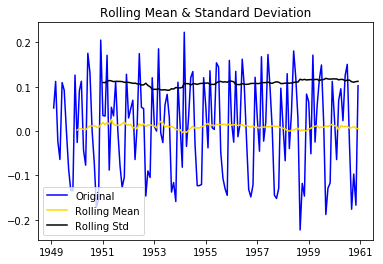

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [27]:
data_diff.dropna(inplace=True)
test_stationarity(data_diff.Passengers)

We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Forecasting" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


### Decomposing
In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned. I’ll skip the statistics and come to the results:

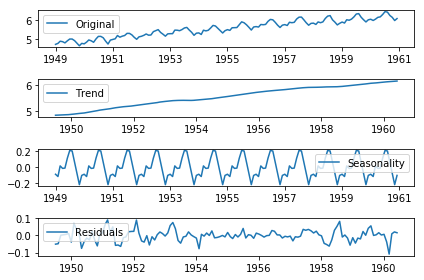

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
# Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

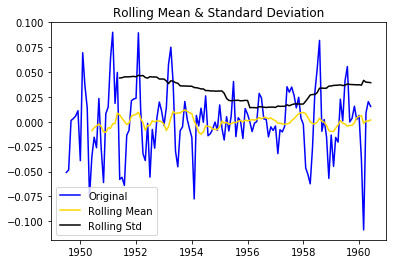

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [29]:
#  Lets check stationarity of residuals:
data_log_decompose = residual
data_log_decompose.dropna(inplace=True)
test_stationarity(data_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary.